<a href="https://colab.research.google.com/github/nathan0000/Stock-Prediction-Using-Twitter-Sentiment-Analysis/blob/master/neuralprophet_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralprophet


     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 76 kB 3.0 MB/s 
     |████████████████████████████████| 748.8 MB 17 kB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving GOOG.csv to GOOG.csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded['GOOG.csv']))
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,724.909973,724.909973,714.609985,716.549988,716.549988,1565300
1,2016-06-07,719.840027,721.979980,716.549988,716.650024,716.650024,1336200
2,2016-06-08,723.960022,728.570007,720.580017,728.280029,728.280029,1583700
3,2016-06-09,722.869995,729.539978,722.335999,728.580017,728.580017,988900
4,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400


In [7]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2016-06-06,716.549988
1,2016-06-07,716.650024
2,2016-06-08,728.280029
3,2016-06-09,728.580017
4,2016-06-10,719.409973


In [9]:
from neuralprophet import NeuralProphet
# m = NeuralProphet() # default model
# our model
m = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=50,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)
#metrics = m.fit(data, freq="D")  # fit the model using all data
# with cross-validation
metrics = m.fit(data, 
                freq="D",
                valid_p=0.2, # validation proportion of data (20%)
                epochs=100)

INFO: nprophet - _handle_missing_data: 566 missing dates were added.
INFO: nprophet - _handle_missing_data: 566 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:21<00:00,  4.56it/s, SmoothL1Loss=0.000819, MAE=42.7, RegLoss=0]


INFO: nprophet - _handle_missing_data: 566 missing dates were added.
INFO: nprophet - _handle_missing_data: 566 NaN values in column y were auto-imputed.


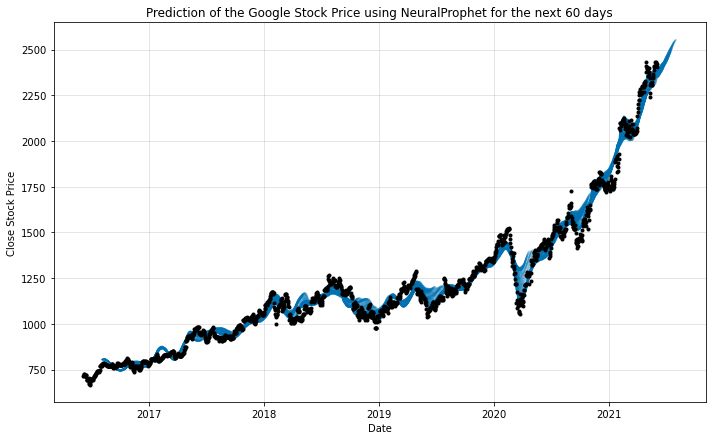

In [10]:
# Predictions
future = m.make_future_dataframe(data, periods=60, n_historic_predictions=len(data)) #we need to specify the number of days in future
prediction = m.predict(future)
# Plotting
forecast = m.plot(prediction)
plt.title("Prediction of the Google Stock Price using NeuralProphet for the next 60 days")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()